# IMDB Movie Reviews Sentiment Analysis

<h2>Name: Muhammad Abdullah</h2>
<h2>Std ID: STU-DS-251-930</h2>

## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('stopwords')

## Load Dataset

In [42]:
df = pd.read_csv("IMDB Dataset.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Exploratory Data Analysis (EDA)

In [43]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Null Values ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

--- Null Values ---
review       0
sentiment    0
dtype: int64


## Remove Duplicates

In [44]:
df = df.drop_duplicates(subset=['review'])
print("After removing duplicates:", df.shape)

After removing duplicates: (49582, 2)


## Sentiment distribution

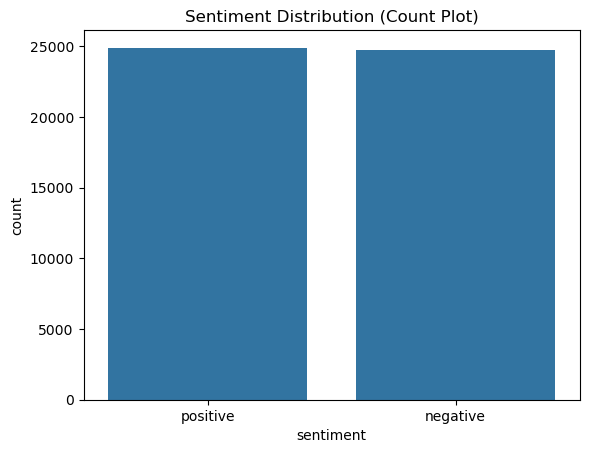

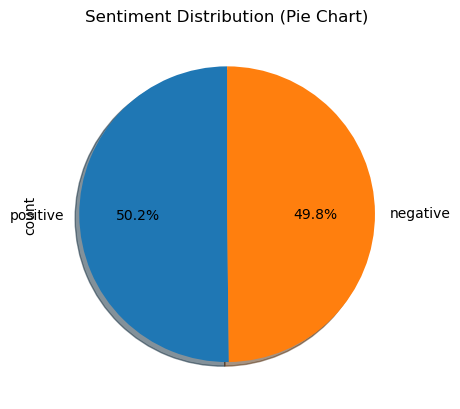

In [45]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution (Count Plot)")
plt.show()

df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()


## Data Prepocessing

In [46]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


In [47]:
df['label'] = df['sentiment'].map({'positive':1, 'negative':0})

In [48]:
df['cleaned_review'] = df['review'].apply(clean_text)
print(df[['review', 'cleaned_review', 'label']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  label  
0  one reviewers mentioned watching 1 oz episode ...      1  
1  wonderful little production filming technique ...      1  
2  thought wonderful way spend time hot summer we...      1  
3  basically family little boy jake thinks zombie...      0  
4  petter mattei love time money visually stunnin...      1  


## Split Data

In [49]:
X = df['cleaned_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])



Train size: 39665 Test size: 9917


## Text Vectorization

In [50]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("TF-IDF Feature shape:", X_train_vec.shape)



TF-IDF Feature shape: (39665, 5000)


## Model Training

In [52]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

## Accuracy

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8550973076535242


## Model Evaluatoin

In [54]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative","Positive"]))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4940
    Positive       0.85      0.86      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



## Confusion Matrix

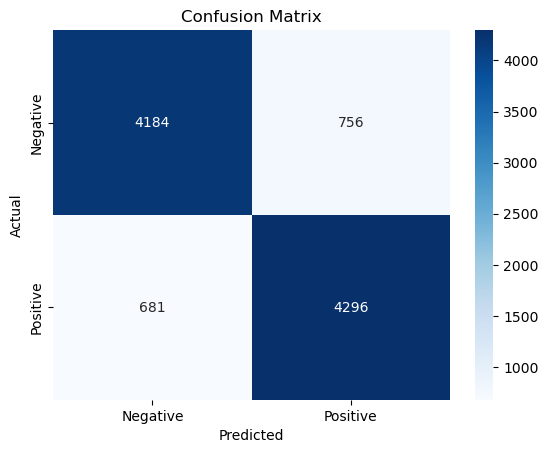

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()